# Telco Customer Churn
### Group One(1) 

### Overview of the Project
The Telco customer churn dataset is a comprehensive dataset designed to simulate real-world customer data for a telecommunications company. This dataset, created by IBM, focuses on customer churn prediction, a critical issue for telecoms and other subscription-based services. The dataset provides a range of customer attributes, allowing for analysis of potential factors that contribute to customer churn. The churn column indicates whether the customer departed within the last month. Other columns include gender, dependents, monthly charges, and many with information about the types of services each customer has.

### Objective

`This project aims to predict customer churn, to help the company proactively identify and retain at-risk customers.` 

## Key Dataset Features

1. **Demographics**:
   - **Attributes**: `gender`, `SeniorCitizen`, `Partner`, `Dependents`
   - **Description**: Demographic information helps us segment the customer base and assess whether churn tendencies vary across different groups.

2. **Customer Account Information**:
   - **Attributes**: `tenure`, `Contract`, `PaymentMethod`
   - **Description**: These fields provide insights into customer engagement with the company, such as their contract duration and preferred payment methods. Such details often correlate with loyalty and churn risk.

3. **Services Subscribed**:
   - **Attributes**: `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `TechSupport`, `DeviceProtection`, `StreamingTV`, `StreamingMovies`
   - **Description**: This section details the products or services each customer subscribes to, offering insights into how different services impact churn likelihood.

4. **Financial Information**:
   - **Attributes**: `MonthlyCharges`, `TotalCharges`, `PaperlessBilling`
   - **Description**: These attributes indicate each customer’s financial commitment, which may strongly influence their decision to stay with or leave the service.

5. **Target Variable - Churn**:
   - **Attributes**: `Churn` (Yes/No)
   - **Description**: This binary variable marks whether a customer has left the service, serving as the target for predictive modeling.

---


## Import Libraries and Load Data

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score,f1_score,recall_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

In [11]:
data = pd.read_csv("Telco Customer Churn.csv")

### Data Overview
We start by loading the dataset and displaying the first and last five rows to get an initial look at its structure. This dataset contains information on Telco customers, their subscription details, and whether or not they churned (left the service).


In [13]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure(months)  \
0  7590-VHVEG  Female              0     Yes         No               1   
1  5575-GNVDE    Male              0      No         No              34   
2  3668-QPYBK    Male              0      No         No               2   
3  7795-CFOCW    Male              0      No         No              45   
4  9237-HQITU  Female              0      No         No               2   

  PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0           No  No phone service             DSL             No  ...   
1          Yes                No             DSL            Yes  ...   
2          Yes                No             DSL            Yes  ...   
3           No  No phone service             DSL            Yes  ...   
4          Yes                No     Fiber optic             No  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0              Yes           Electronic check          29.85         29.85   
1               No               Mailed check          56.95        1889.5   
2              Yes               Mailed check          53.85        108.15   
3               No  Bank transfer (automatic)          42.30       1840.75   
4              Yes           Electronic check          70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes  

[5 rows x 21 columns]

In [14]:
data.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure(months)  \
7038  6840-RESVB    Male              0     Yes        Yes              24   
7039  2234-XADUH  Female              0     Yes        Yes              72   
7040  4801-JZAZL  Female              0     Yes        Yes              11   
7041  8361-LTMKD    Male              1     Yes         No               4   
7042  3186-AJIEK    Male              0      No         No              66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]

In [15]:
data.shape

(7043, 21)

### Check data types and missing values

In [17]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure(months)      0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure(months)    7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Handle Missing Values and Drop Columns


In [20]:
# Converting Total Charges to a numerical data type.
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [21]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure(months)       0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [22]:
# Dropping rows with missing values in TotalCharges
data.dropna(inplace = True)

In [23]:
# Drop customerID
data.drop(columns=['customerID'], inplace=True)

In [24]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure(months)        int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [25]:
df = data

In [26]:
df.shape

(7032, 20)

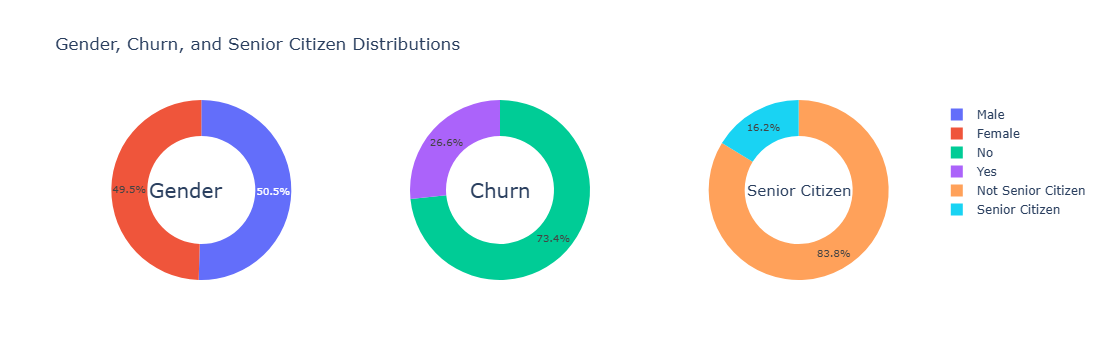

In [27]:
# Gender, Churn, and Senior Citizen Distribution 
gender_labels = ['Male', 'Female']
churn_labels = ['No', 'Yes']
senior_labels = ['Not Senior Citizen', 'Senior Citizen']

# Create subplots with 1 row and 3 columns, using 'domain' type for each pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]])

# For the Gender distribution
fig.add_trace(go.Pie(labels=gender_labels, values=df['gender'].value_counts(), name="Gender"), 1, 1)

# For the Churn distribution
fig.add_trace(go.Pie(labels=churn_labels, values=df['Churn'].value_counts(), name="Churn"), 1, 2)

# For the Senior Citizen distribution
fig.add_trace(go.Pie(labels=senior_labels, values=df['SeniorCitizen'].value_counts(), name="Senior Citizen"), 1, 3)

# Use hole to create doughnut-like pie charts
fig.update_traces(hole=.6, hoverinfo="label+percent+name", textfont_size=10)

# Update layout for titles and annotations in the center of the donut charts
fig.update_layout(
    title_text="Gender, Churn, and Senior Citizen Distributions",
    annotations=[dict(text='Gender', x=0.08, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.5, y=0.5, font_size=20, showarrow=False),
                 dict(text='Senior Citizen', x=0.92, y=0.5, font_size=15, showarrow=False)])

# Display the plot
fig.show()


In [28]:
# Gender Distribution of Non-Churned Customers
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

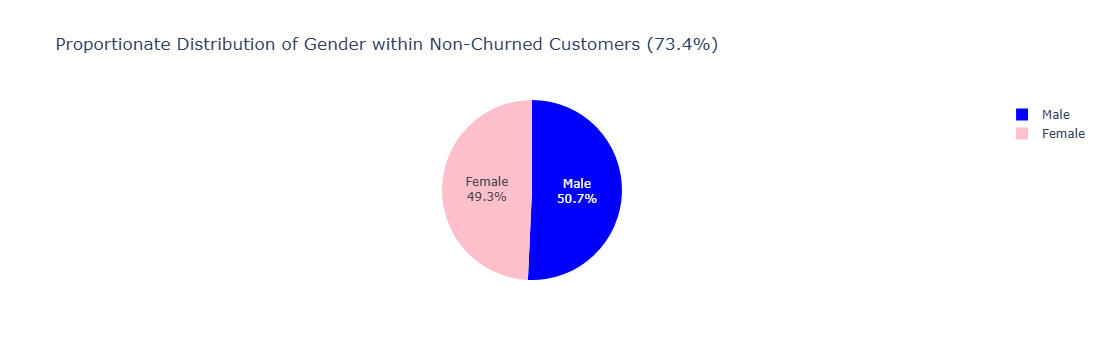

In [29]:
import plotly.express as px

# Create a subset of the data with only non-churning customers
churn_no = df[df["Churn"] == "No"]

# Calculate the gender distribution as a percentage of the 73.4% non-churning customers
gender_counts = churn_no["gender"].value_counts(normalize=True) * 73.4  # Adjusted to reflect 73.4% non-churn rate

# Convert to DataFrame with the correct column names
gender_counts = gender_counts.rename_axis('gender').reset_index(name='percentage')

# Plot with Plotly Express as a pie chart
fig = px.pie(gender_counts, 
             names='gender', 
             values='percentage', 
             color='gender',
             color_discrete_map={"Male": "blue", "Female": "pink"},
             title='Proportionate Distribution of Gender within Non-Churned Customers (73.4%)')

# Show the percentage labels on the pie chart
fig.update_traces(textinfo='percent+label')

# Display the pie chart
fig.show()


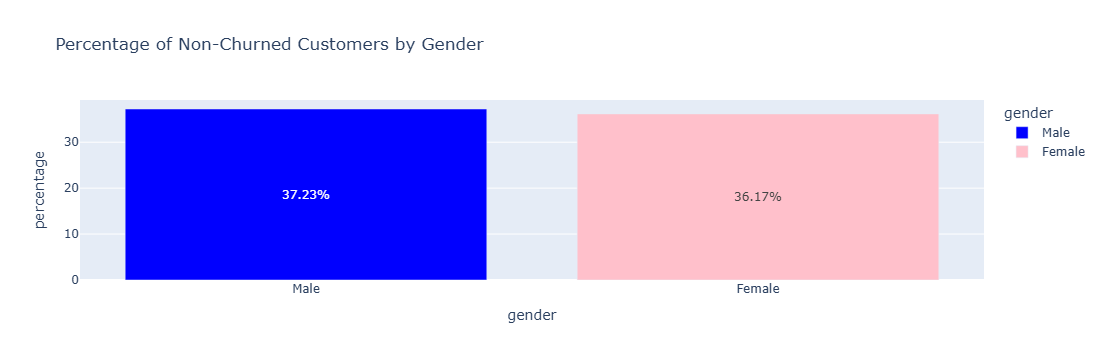

In [30]:
import plotly.express as px

# Create a subset of the data with only non-churning customers
churn_no = df[df["Churn"] == "No"]

# Calculate percentages for each gender
gender_counts = churn_no["gender"].value_counts(normalize=True) * 73.4
gender_counts = gender_counts.rename_axis('gender').reset_index(name='percentage')

# Plot with Plotly Express
fig = px.bar(gender_counts, x='gender', y='percentage',
             color='gender',
             color_discrete_map={"Male": "blue", "Female": "pink"},
             text=gender_counts['percentage'].apply(lambda x: f'{x:.2f}%'),
             title='Percentage of Non-Churned Customers by Gender')

# Place the percentage labels inside the bars
fig.update_traces(texttemplate='%{text}', textposition='inside', insidetextanchor='middle')

fig.show()

In [31]:
# Gender Distribution of Churned Customers
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count() 

gender
Female    939
Male      930
Name: Churn, dtype: int64

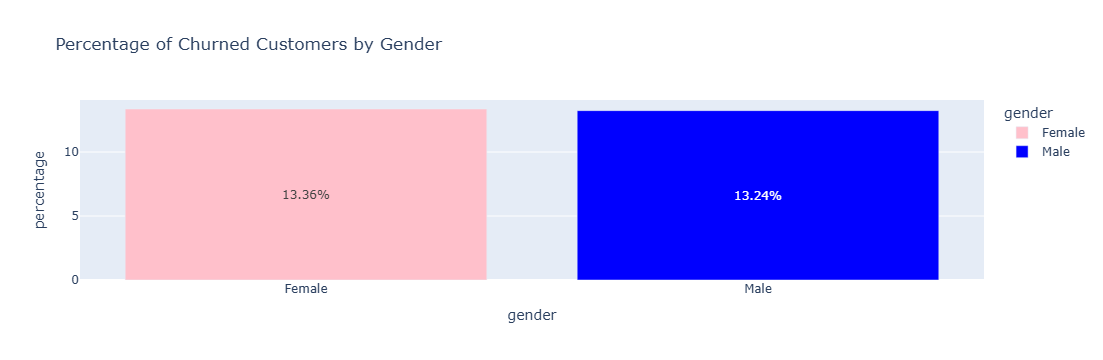

In [32]:
import plotly.express as px

# Create a subset of the data with only non-churning customers
churn_no = df[df["Churn"] == "Yes"]

# Calculate percentages for each gender
gender_counts = churn_no["gender"].value_counts(normalize=True) * 26.6
gender_counts = gender_counts.rename_axis('gender').reset_index(name='percentage')

# Plot with Plotly Express
fig = px.bar(gender_counts, x='gender', y='percentage',
             color='gender',
             color_discrete_map={"Male": "blue", "Female": "pink"},
             text=gender_counts['percentage'].apply(lambda x: f'{x:.2f}%'),
             title='Percentage of Churned Customers by Gender')

# Place the percentage labels inside the bars
fig.update_traces(texttemplate='%{text}', textposition='inside', insidetextanchor='middle')

fig.show()

In [33]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure(months)        int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Churn by Demographic Categories (Gender, SeniorCitizen, Partner, Dependents)

This visualization explores how customer demographics relate to churn. By examining churn rates across categories like gender, age (SeniorCitizen), and relationships (Partner, Dependents), we can identify any demographic patterns associated with churn.


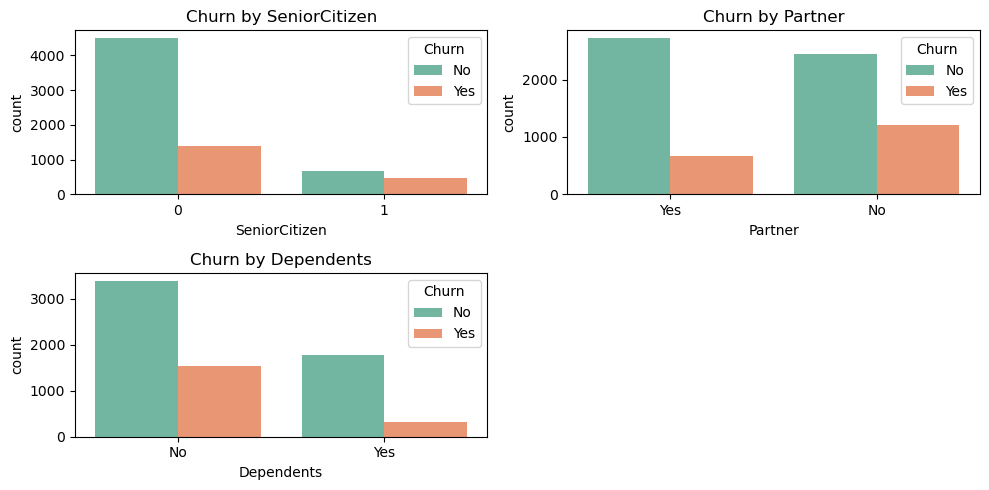

In [35]:
# Plot churn by demographic categories
plt.figure(figsize=(10, 5))
for i, col in enumerate(['SeniorCitizen', 'Partner', 'Dependents'], 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, hue='Churn', palette='Set2')
    plt.title(f'Churn by {col}')
plt.tight_layout()
plt.show()

### Churn by Subscription Services (PhoneService, InternetService, StreamingTV, StreamingMovies)

This analysis focuses on whether certain services impact churn. Customers subscribing to services like `InternetService` or `StreamingTV` might show different churn behaviors, potentially due to perceived value or satisfaction with these offerings.


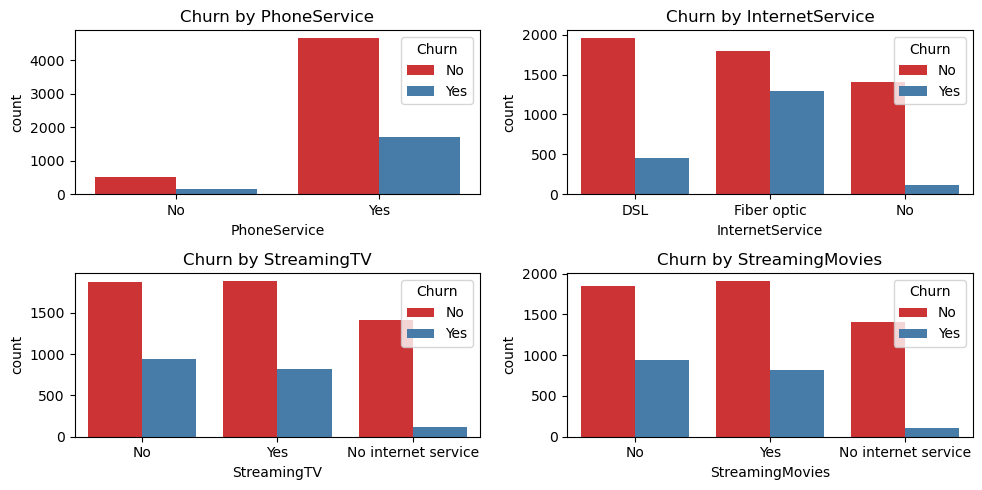

In [37]:
# Churn by subscription services
plt.figure(figsize=(10, 5))
for i, col in enumerate(['PhoneService', 'InternetService', 'StreamingTV', 'StreamingMovies'], 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, hue='Churn', palette='Set1')
    plt.title(f'Churn by {col}')
plt.tight_layout()
plt.show()

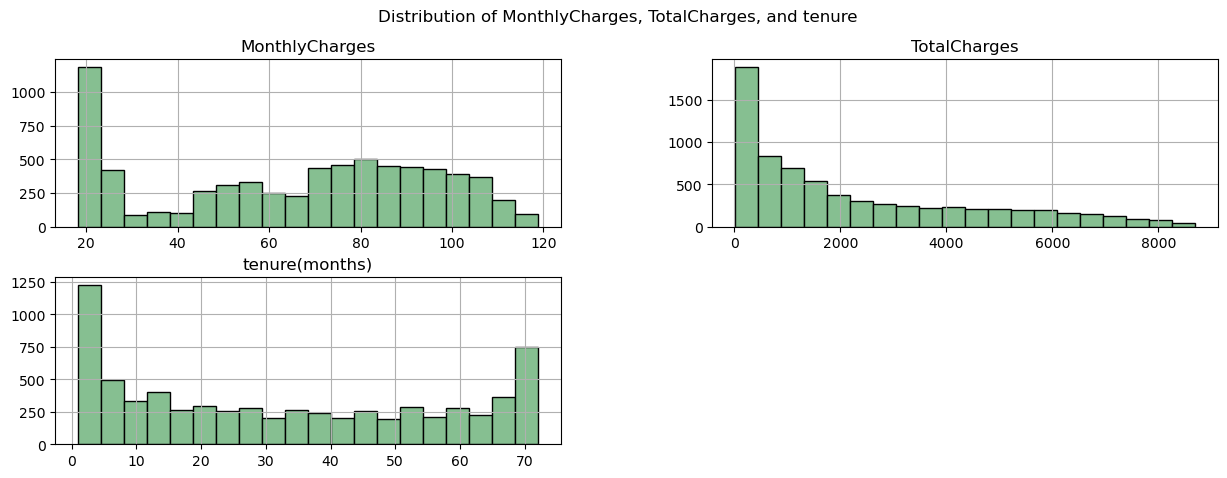

In [38]:
# Histograms for numerical columns
num_cols = ['MonthlyCharges', 'TotalCharges', 'tenure(months)']
df[num_cols].hist(bins=20, figsize=(15, 5), color='#86bf91', edgecolor='black')
plt.suptitle('Distribution of MonthlyCharges, TotalCharges, and tenure')
plt.show()

###  Churn by Tenure and Contract Type
In this boxplot, we explore how customer tenure varies across contract types and churn status. This analysis can reveal if customers on shorter contracts or with lower tenure are more likely to churn.


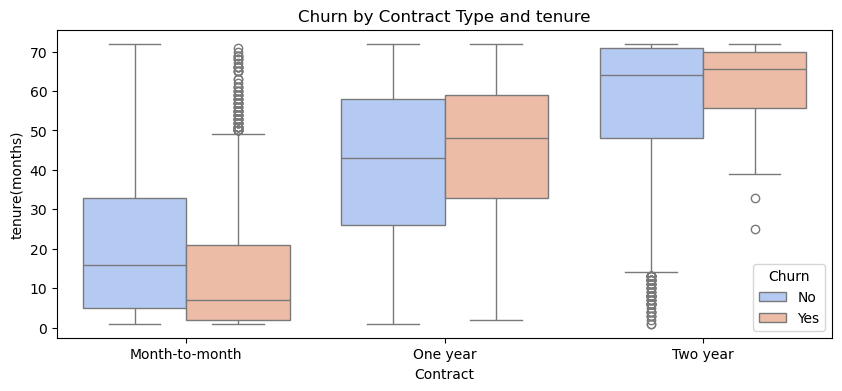

In [55]:
# Churn by tenure and contract type
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='Contract', y='tenure(months)', hue='Churn', palette='coolwarm')
plt.title('Churn by Contract Type and tenure')
plt.show()

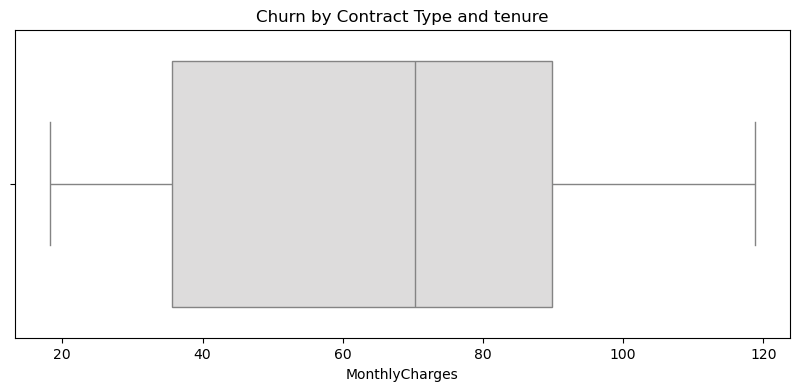

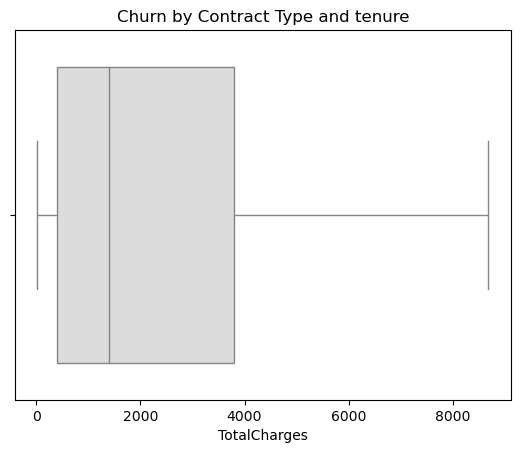

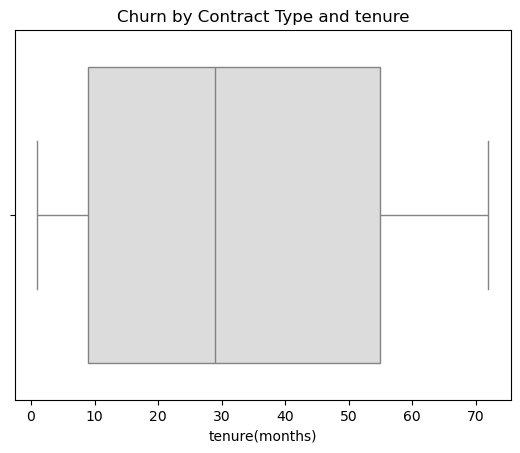

In [56]:
# Churn by tenure and contract type
plt.figure(figsize=(10, 4))
num_cols = ['MonthlyCharges', 'TotalCharges', 'tenure(months)']
for i in num_cols:
    sns.boxplot(data=df, x= i, palette='coolwarm')
    plt.title('Churn by Contract Type and tenure')
    plt.show()

### Monthly Charges by Payment Method and Churn Status
This boxplot shows how MonthlyCharges differ across payment methods and churn status. Payment methods could affect churn if customers perceive certain methods as more convenient or cost-effective.


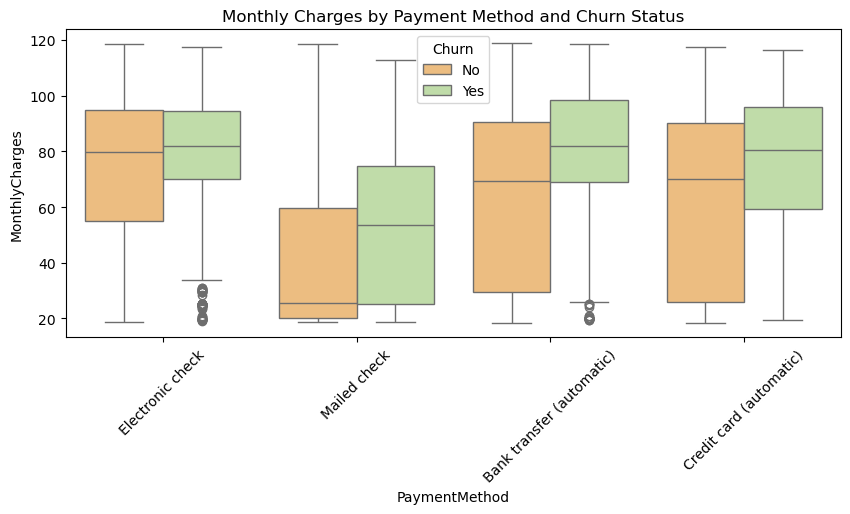

In [65]:
# Monthly Charges by Payment Method and Churn status
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='PaymentMethod', y='MonthlyCharges', hue='Churn', palette='Spectral')
plt.title('Monthly Charges by Payment Method and Churn Status')
plt.xticks(rotation=45)
plt.show()

## Distribution of various payment Methods

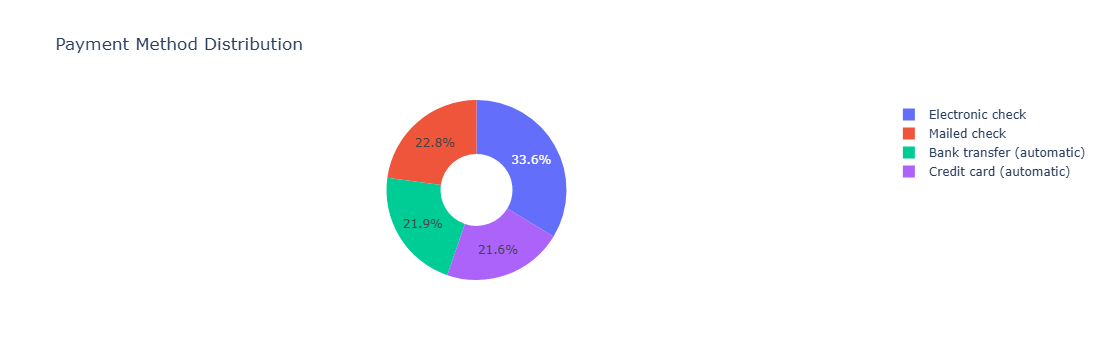

In [68]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text="Payment Method Distribution", font = dict(size=12))
fig.show()

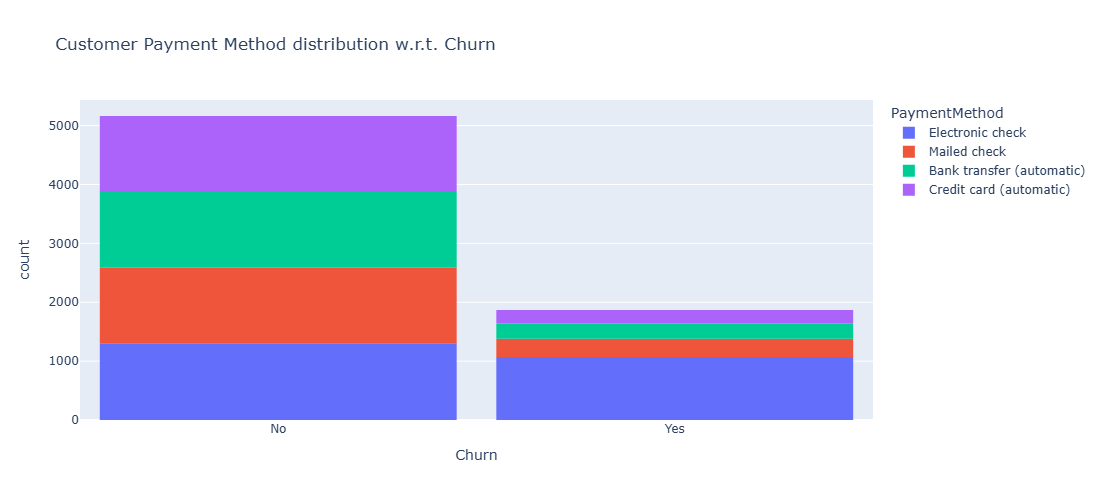

In [70]:
#Payment method distribution with respect to churn
fig = px.histogram(df, x="Churn", color="PaymentMethod", 
                   title="Customer Payment Method distribution w.r.t. Churn")

fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

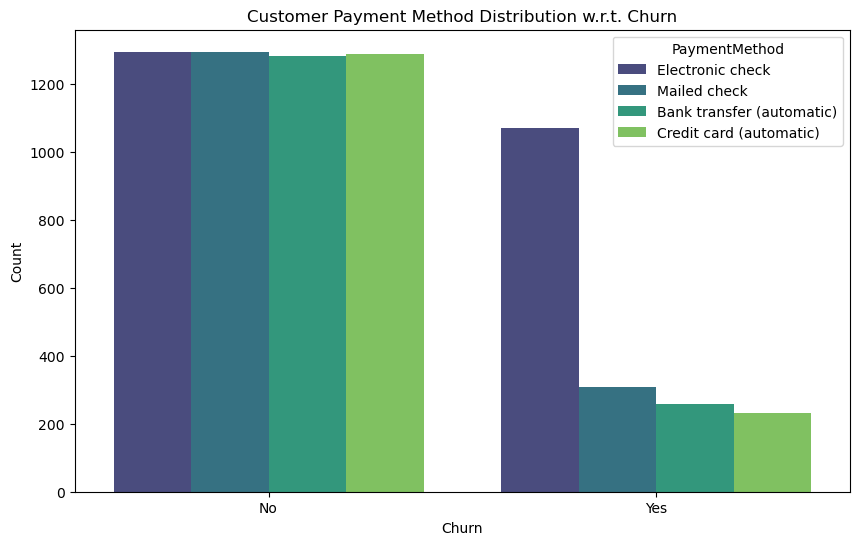

In [72]:

plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df, x='Churn', hue='PaymentMethod', palette='viridis')

plt.title('Customer Payment Method Distribution w.r.t. Churn')
plt.xlabel('Churn')
plt.ylabel('Count')

plt.show()


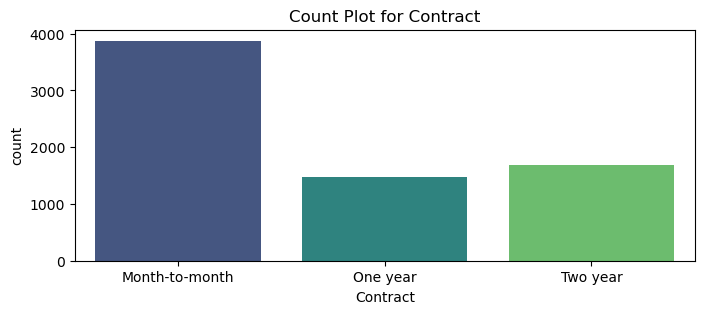

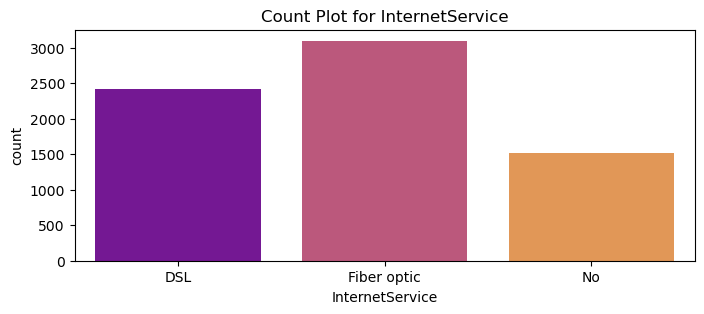

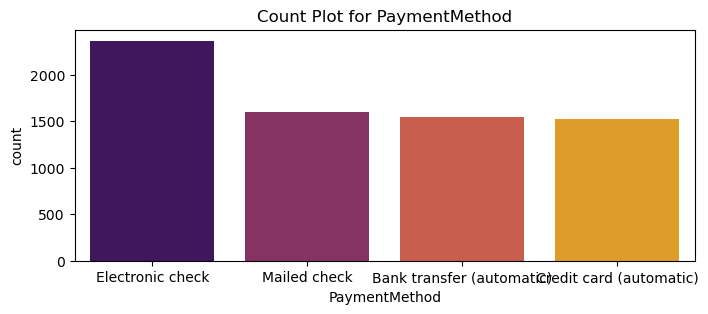

In [77]:

   import matplotlib.pyplot as plt
import seaborn as sns

def countplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Count Plot for {}".format(feature))
    ax = sns.countplot(x=feature, data=frame, palette=color)
    plt.show()

# Assuming 'df' is your DataFrame and 'num_cols' contains categorical features
# Update num_cols to include categorical features
colors = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'cubehelix', 'coolwarm']
num_cols = ['Contract', 'InternetService', 'PaymentMethod']  # Example categorical features
for i, feat in enumerate(num_cols): 
    color = colors[i % len(colors)] # Cycle through the color list countplot(feat, df, color)
    countplot(feat, df, color)


## Distribution of subscriptions

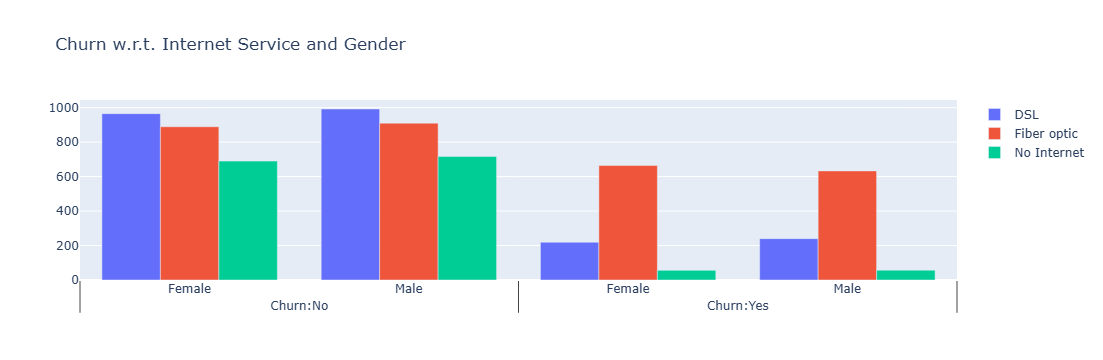

In [82]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',))

fig.update_layout(title_text="Churn w.r.t. Internet Service and Gender")

fig.show()

In [84]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure(months)',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

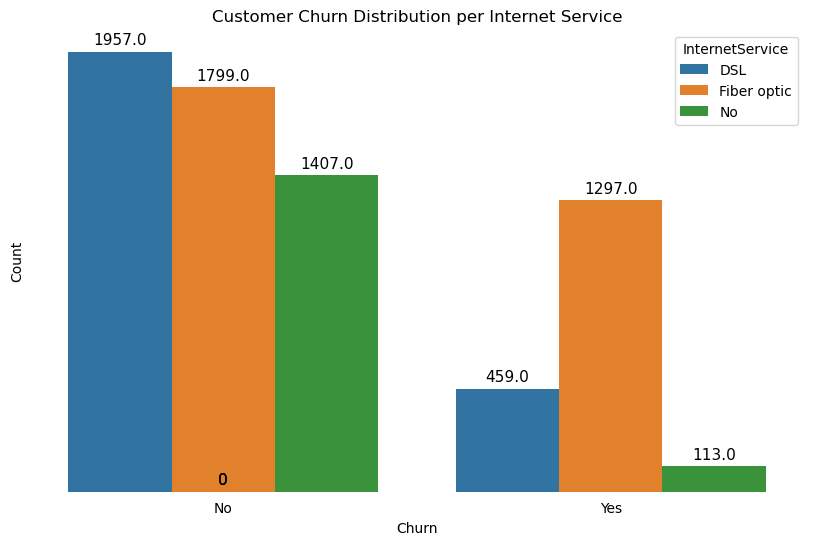

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# #data = {
#     'Churn': ['No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes'],
#     'Gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
#     'InternetService': ['DSL', 'DSL', 'DSL', 'DSL', 'Fiber optic', 'Fiber optic', 'Fiber optic', 'Fiber optic', 'No Internet', 'No Internet', 'No Internet', 'No Internet'],
#     'Count': [965, 992, 219, 240, 889, 910, 664, 633, 690, 717, 56, 57]
# }

#df1 = pd.DataFrame(data)

t = df.groupby(['Churn','InternetService']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=t, x='Churn', y = 'Count', hue='InternetService', ci=None)

# Add counts on the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Taking off all ticks
plt.tick_params(axis='x', which='both', top=False,bottom=False, labelleft=False,reset=True)
plt.tick_params(axis='y', which='both', right=False,left=False, labelleft=False,reset=True)

# Taking off spines
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)

# Set the title and labels
plt.title('Customer Churn Distribution per Internet Service')
plt.xlabel('Churn')
plt.ylabel('Count')

# Show the plot
plt.show()


In [88]:
t.columns

Index(['Churn', 'InternetService', 'Count'], dtype='object')

<Figure size 1000x600 with 0 Axes>

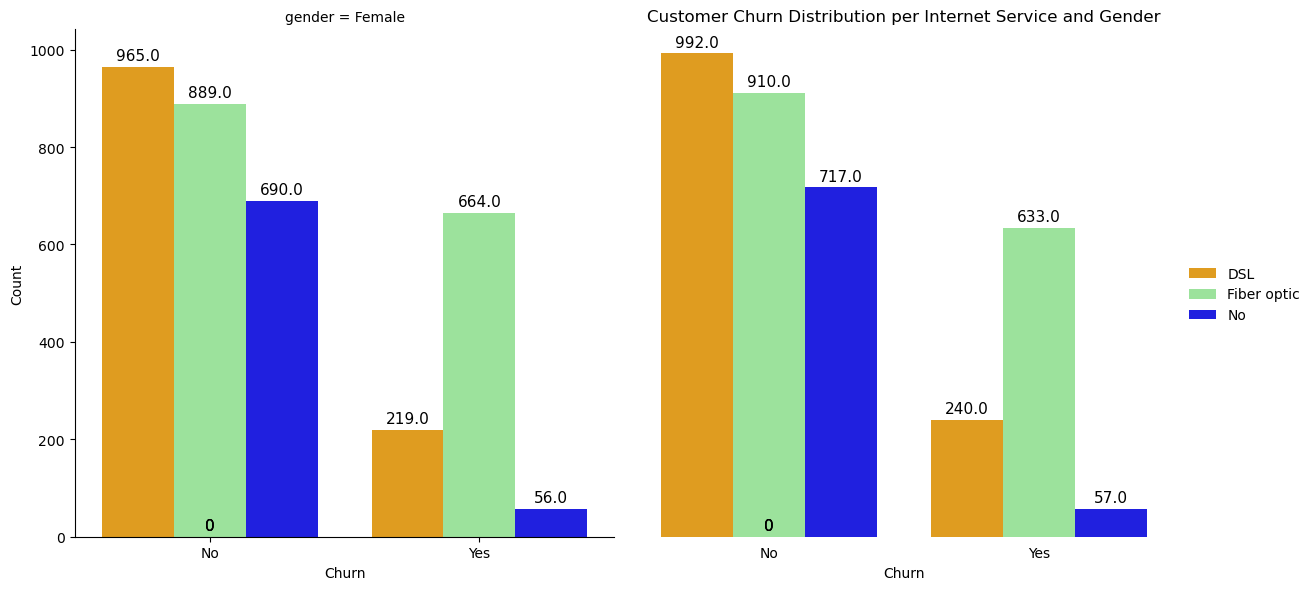

In [90]:
d = df.groupby(['gender','Churn','InternetService',]).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))

custom_color = ['orange', 'lightgreen', 'blue']

g = sns.FacetGrid(d, col="gender", height=6, aspect=1)
g.map_dataframe(sns.barplot, x="Churn", y="Count", hue="InternetService", palette=custom_color, ci=None)
g.add_legend()

#ax = sns.barplot(data=d, x='Churn', y = 'Count', hue='InternetService', ci=None)

# Add counts on the bars
def annotate_bars(ax, **kwargs):
  for p in ax.patches:
      height = p.get_height()
      ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')


for ax in g.axes.flat:
    annotate_bars(ax)   # Applying the annotation function to each subplot in the grid

# Taking off all ticks
plt.tick_params(axis='x', which='both', top=False,bottom=False, labelleft=False,reset=True)
plt.tick_params(axis='y', which='both', right=False,left=False, labelleft=False,reset=True)


# Taking off spines
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)

# Set the title and labels
plt.title('Customer Churn Distribution per Internet Service and Gender')
plt.xlabel('Churn')
plt.ylabel('Count')

# Show the plot
plt.show()


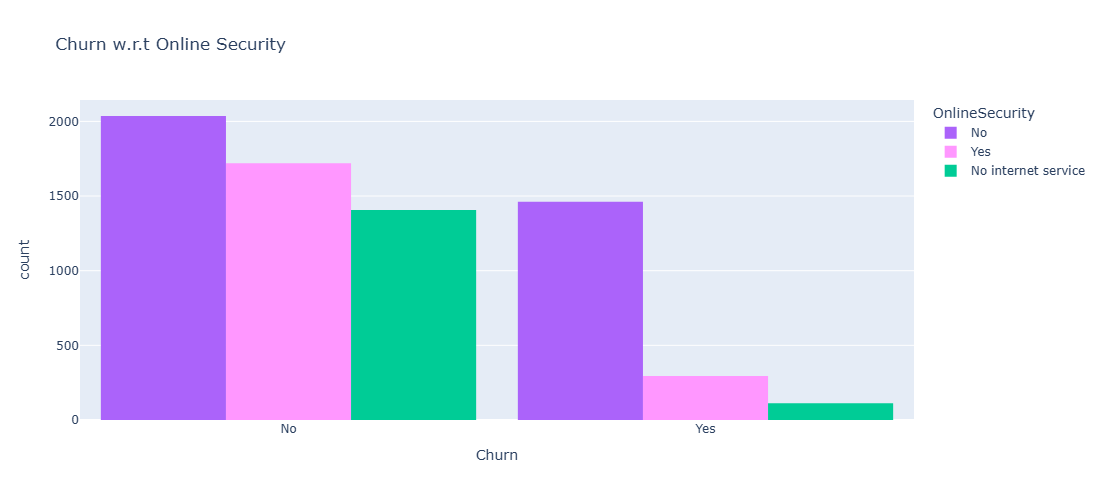

In [92]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color='OnlineSecurity',barmode="group", title="Churn w.r.t Online Security", color_discrete_map=color_map)
#plt.legend("OnlineSecurity")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

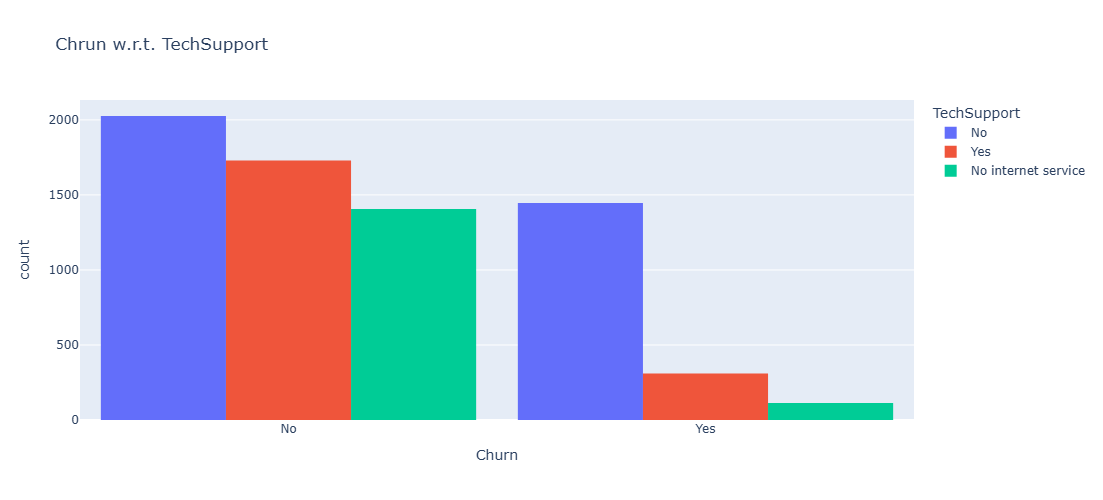

In [94]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="Chrun w.r.t. TechSupport")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [96]:
# Convert binary categorical columns to numeric (Yes = 1, No = 0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})

In [98]:
# Apply one-hot encoding (drop_first=True to avoid multicollinearity)
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies.head()

SeniorCitizen  Partner  Dependents  tenure(months)  MonthlyCharges  \
0              0        1           0               1           29.85   
1              0        0           0              34           56.95   
2              0        0           0               2           53.85   
3              0        0           0              45           42.30   
4              0        0           0               2           70.70   

   TotalCharges  Churn  gender_Male  PhoneService_Yes  \
0         29.85      0        False             False   
1       1889.50      0         True              True   
2        108.15      1         True              True   
3       1840.75      0         True             False   
4        151.65      1        False              True   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                            True  ...                            False   
1                           False  ...                            False   
2                           False  ...                            False   
3                            True  ...                            False   
4                           False  ...                            False   

   StreamingTV_Yes  StreamingMovies_No internet service  StreamingMovies_Yes  \
0            False                                False                False   
1            False                                False                False   
2            False                                False                False   
3            False                                False                False   
4            False                                False                False   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0              False              False                  True   
1               True              False                 False   
2              False              False                  True   
3               True              False                 False   
4              False              False                  True   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  
0                       False  
1                        True  
2                        True  
3                       False  
4                       False  

[5 rows x 31 columns]

In [100]:


tenure_values = df['tenure(months)'].values 

# Calculate skewness 
tenure_skewness = skew(tenure_values) 
print("Skewness of tenure:", tenure_skewness)


Skewness of tenure: 0.23768011839839964


In [102]:


# Ensure the 'TotalCharges' column exists
if 'TotalCharges' in df.columns:
    # Convert 'TotalCharges' to numeric, setting errors='coerce' will convert non-numeric values to NaN
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    
    # Drop rows with NaN values in 'TotalCharges'
    df = df.dropna(subset=['TotalCharges'])
    
    # Extract the 'TotalCharges' column values as a NumPy array
    TotalCharges_values = df['TotalCharges'].values

    # Calculate skewness
    TotalCharges_skewness = skew(TotalCharges_values)

    print("Skewness of TotalCharges:", TotalCharges_skewness)
else:
    print("The 'TotalCharges' column does not exist in the DataFrame.")


Skewness of TotalCharges: 0.9614373590490068


In [104]:


# Ensure the 'MonthlyCharges' column exists
if 'MonthlyCharges' in df.columns:
    # Extract the 'MonthlyCharges' column values as a NumPy array
    MonthlyCharges_values = df['MonthlyCharges'].values

    # Calculate skewness
    MonthlyCharges_skewness = skew(MonthlyCharges_values)

    print("Skewness of MonthlyCharges:", MonthlyCharges_skewness)
else:
    print("The 'MonthlyCharges' column does not exist in the DataFrame.")


Skewness of MonthlyCharges: -0.22205554798978874


In [106]:
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure(months) PhoneService  \
0  Female              0        1           0               1           No   
1    Male              0        0           0              34          Yes   
2    Male              0        0           0               2          Yes   
3    Male              0        0           0              45           No   
4  Female              0        0           0               2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1

In [108]:
# Encode PhoneService as binary: 1 = Yes, 0 = No
df['PhoneService'] = df['PhoneService'].apply(lambda x: 1 if x == 'Yes' else 0)

# Encode InternetService where 0 = 'No', 1 = 'DSL', 2 = 'Fiber optic'
df['InternetService'] = df['InternetService'].map({'No': 0, 'DSL': 1, 'Fiber optic': 2})

# Encode dependent columns based on PhoneService and InternetService availability
# 0 = No, 
# 1 = Yes, 
# 2 = No service (due to lack of primary service)

# MultipleLines depends on PhoneService
df['MultipleLines'] = df.apply(lambda row: 2 if row['PhoneService'] == 0 else (1 if row['MultipleLines'] == 'No' else 0), axis=1)

# Columns that depend on InternetService
internet_dependent_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Apply conditional encoding for InternetService-dependent columns
for col in internet_dependent_cols:
    df[col] = df.apply(lambda row: 2 if row['InternetService'] == 0 else (1 if row[col] == 'No' else 0), axis=1)

# Encode PaperlessBilling as binary since it's only Yes/No
le = LabelEncoder()
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])

# Encode multi-category columns Contract and PaymentMethod with integer codes
multi_category_columns = ['Contract', 'PaymentMethod']
for col in multi_category_columns:
    df[col] = le.fit_transform(df[col])

# Display the updated dataframe
df.head()


gender  SeniorCitizen  Partner  Dependents  tenure(months)  PhoneService  \
0  Female              0        1           0               1             0   
1    Male              0        0           0              34             1   
2    Male              0        0           0               2             1   
3    Male              0        0           0              45             0   
4  Female              0        0           0               2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              2                1               1             0   
1              1                1               0             1   
2              1                1               0             0   
3              2                1               0             1   
4              1                2               1             1   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 1            1            1                1         0   
1                 0            1            1                1         1   
2                 1            1            1                1         0   
3                 0            0            1                1         1   
4                 1            1            1                1         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

In [109]:
#df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})

In [110]:
# Encode Gender as binary: 0 = Male, 1 = Female
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Female' else 0)

In [114]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure(months)',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [116]:
# Set options to display all columns and all rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [118]:
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure(months)  PhoneService  \
0       1              0        1           0               1             0   
1       0              0        0           0              34             1   
2       0              0        0           0               2             1   
3       0              0        0           0              45             0   
4       1              0        0           0               2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              2                1               1             0   
1              1                1               0             1   
2              1                1               0             0   
3              2                1               0             1   
4              1                2               1             1   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 1            1            1                1         0   
1                 0            1            1                1         1   
2                 1            1            1                1         0   
3                 0            0            1                1         1   
4                 1            1            1                1         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

In [120]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure(months)        int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

# Column Encoding Explanation:

##### 1. **PhoneService** (Binary encoding)
- **1** = 'Yes' (has phone service)
- **0** = 'No' (no phone service)

##### 2. **InternetService** (Mapping to numeric codes)
- **0** ervice)
- **1** = 'DSL' (DSL internet service)
- **2** = 'Fiber optic' (Fiber optic internet service)

##### 3. **MultipleLines** (Dependent on PhoneService)
- **0** = No phone service (no multiple lines availableNo {)
- **1** = Single line (customer has on}e phone linYes {e)
- **2** = Multiple lines (customer has more than o}ne phone line)

##### 4. **OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies**  
These columns depend on **InternetService**:
- **0** = No internet service (cannot access these features)
- **1** = No (service is not enabled)
- **2** = Yes (service is enabled)

##### 5. **PaperlessBilling** (Binary encoding)
- **0** = 'No' (no paperless billing)
- **1** = 'Yes' (paperless billing)

##### 6. **Contract** (Multi-category encoding)
- **0** = 'Month-to-month'
- **1** = 'One year'
- **2** = 'Two year'

##### 7. **PaymentMethod** (Multi-category encoding)
- **0** = 'Electronic check'
- **1** = 'Mailed check'
- **2** = 'Bank transfer (automatic)'
- **3** = 'Credit card (automatic)'


In [123]:
corr_matrix = df.corr()

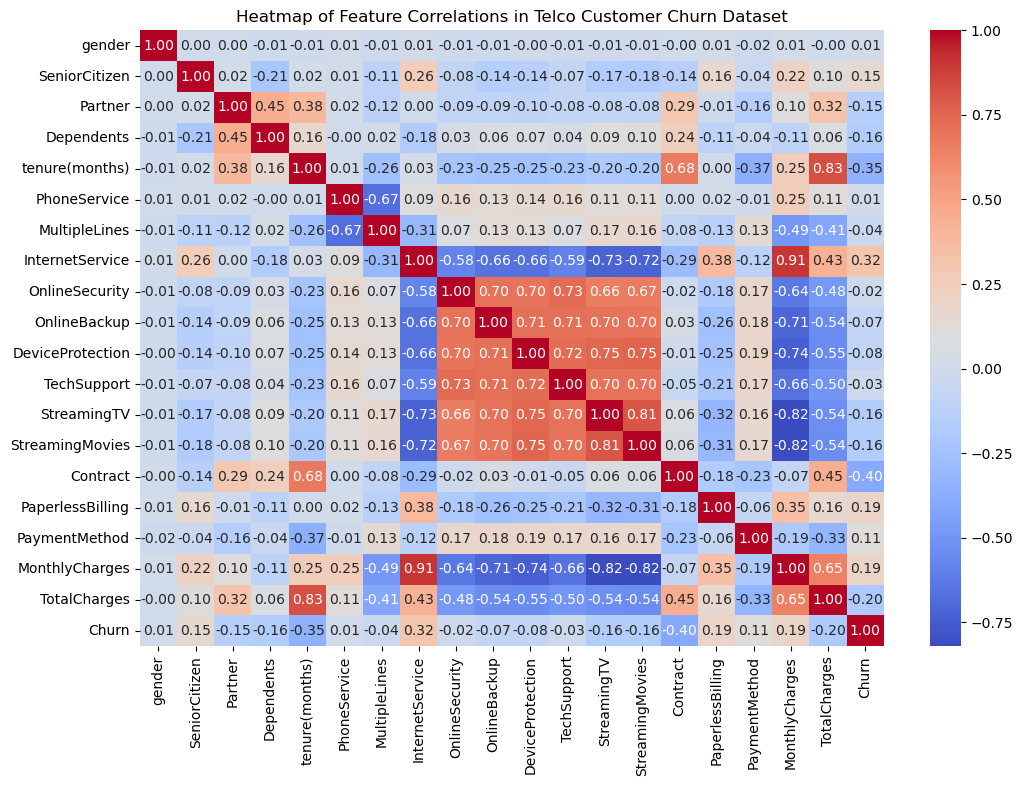

In [125]:
#mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
#sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

#label_encoder = LabelEncoder() 
#df['gender'] = label_encoder.fit_transform(df['gender'])

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Feature Correlations in Telco Customer Churn Dataset') 
plt.show()

### After going through the above EDA we will develop some predictive models and compare them.

#### We will develop Logistic Regression, Random Forest, SVC, KNN, ADA Boost, Gradient Boosting Classifier, Decision Tree Classifier, Voting Classifie and XG Boost

##### 1. Logistic Regression

In [130]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
InternetService     0.316350
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
PhoneService        0.011691
gender              0.008545
OnlineSecurity     -0.023014
TechSupport        -0.026744
MultipleLines      -0.036148
OnlineBackup       -0.073934
DeviceProtection   -0.084402
Partner            -0.149982
StreamingMovies    -0.162672
Dependents         -0.163128
StreamingTV        -0.164509
TotalCharges       -0.199484
tenure(months)     -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [132]:
# X = df.drop(columns = ['Churn'])
# y = df['Churn'].values

In [134]:
# data = pd.DataFrame({
#     'feature1': df['PaymentMethod'], #PhoneService
#     'feature2': df['TotalCharges'],
#     'feature3': df['TechSupport'],
#     'feature4': df['Contract'],
#     'feature5': df['InternetService'],
#     'feature6': df['SeniorCitizen'],
#     'target': df['Churn']
# })

In [136]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [136]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 40, stratify=y)

In [138]:
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure(months)  PhoneService  \
0       1              0        1           0               1             0   
1       0              0        0           0              34             1   
2       0              0        0           0               2             1   
3       0              0        0           0              45             0   
4       1              0        0           0               2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              2                1               1             0   
1              1                1               0             1   
2              1                1               0             0   
3              2                1               0             1   
4              1                2               1             1   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 1            1            1                1         0   
1                 0            1            1                1         1   
2                 1            1            1                1         0   
3                 0            0            1                1         1   
4                 1            1            1                1         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

#### Since the numerical features are distributed over different value ranges, we will use robust scaler to scale them down to the same range

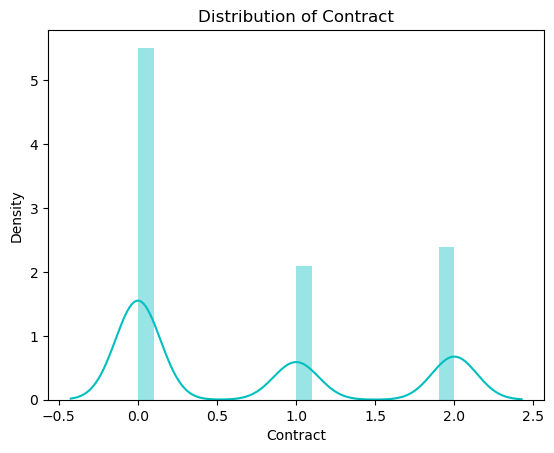

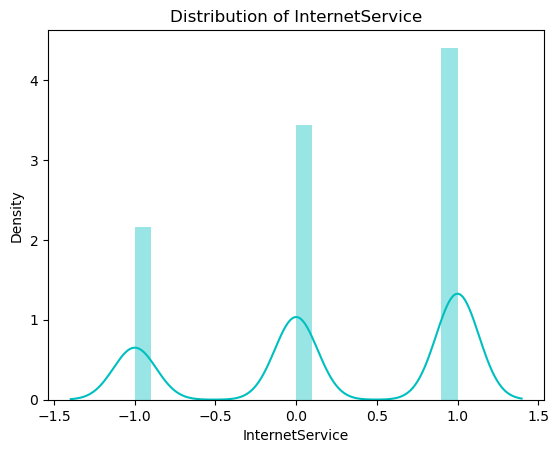

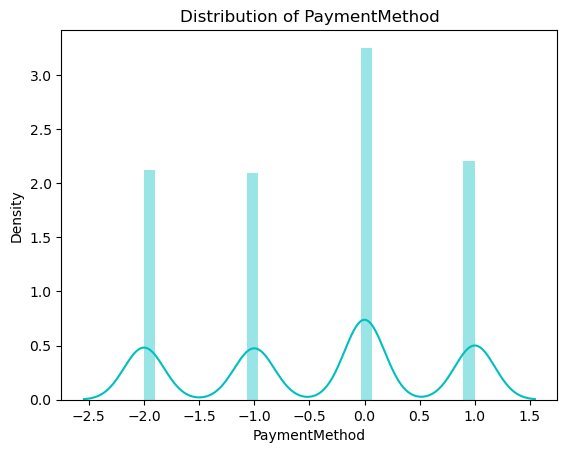

In [141]:
df_std = pd.DataFrame(RobustScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in num_cols:
    sns.distplot(df_std[feat], kde=True, color='c')
    plt.title(f'Distribution of {feat}')
    plt.show()

In [143]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

#cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
#at_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [145]:
totalcharges_values = df['TotalCharges'].values 

# Calculate skewness 
totalcharges_skewness = skew(totalcharges_values) 
print("Skewness of TotalCharges :", totalcharges_skewness)

Skewness of TotalCharges : 0.9614373590490068


In [147]:
df['TotalCharges'] = np.log1p(df['TotalCharges'])

In [149]:
scaler = RobustScaler()
df[['TotalCharges']] = scaler.fit_transform(df[['TotalCharges']])

In [151]:
selected_features = ['SeniorCitizen', 'TechSupport', 'Contract', 'InternetService', 'TotalCharges', 'PaymentMethod']
X = df[selected_features] 
y = df[['Churn']] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [153]:
X.columns

Index(['SeniorCitizen', 'TechSupport', 'Contract', 'InternetService',
       'TotalCharges', 'PaymentMethod'],
      dtype='object')

In [155]:
y.columns

Index(['Churn'], dtype='object')

## Machine Learning Model Evaluations and Predictions

## Logistic Regression

In [159]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1_Score:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.7910447761194029
Precision: 0.6398601398601399
F1_Score: 0.5545454545454546
Recall: 0.4893048128342246


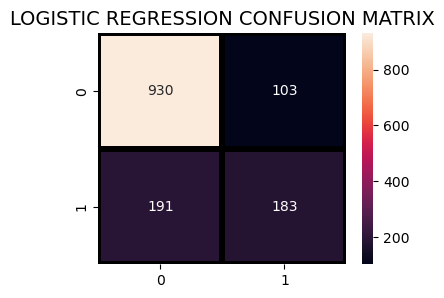

In [166]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

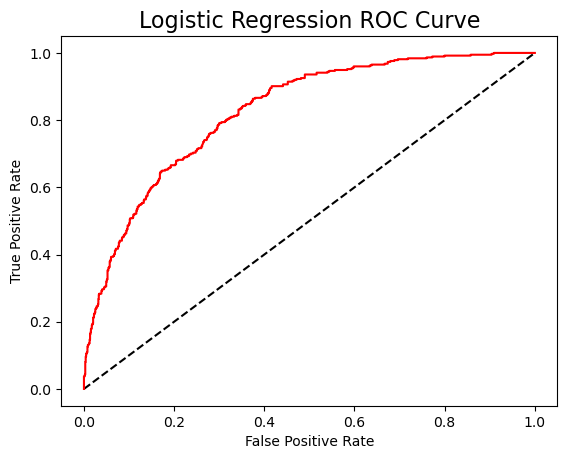

In [167]:
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

### KNN

Shape of k_values: 29
Shape of cv_scores: (29,)


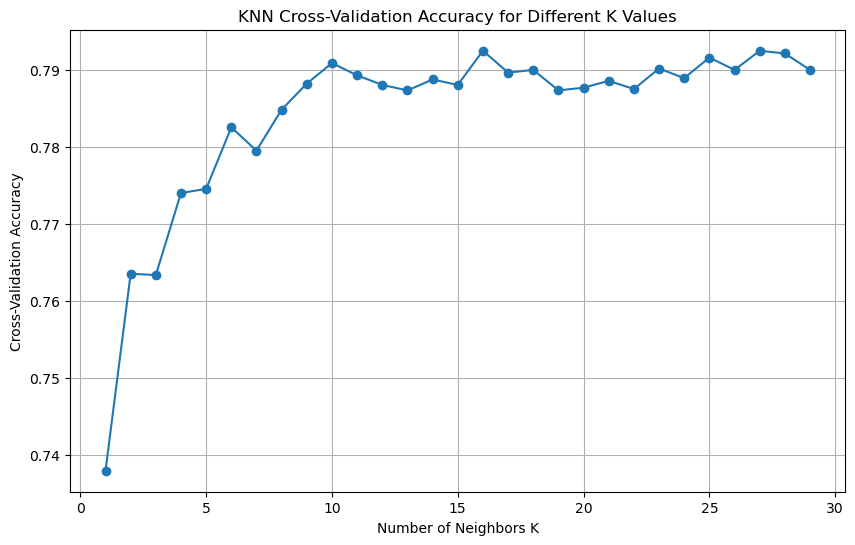

Best K Value: 16


In [171]:
# Define a range of k values 
k_values = list(range(1, 30)) 
cv_scores = [] 

# Perform cross-validation for each k value 
for k in k_values: 
    knn = KNeighborsClassifier(n_neighbors=k) 
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy') 
    cv_scores.append(scores.mean())

cv_scores = np.array(cv_scores) 

# Debugging: Print shapes to verify they match 
print(f'Shape of k_values: {len(k_values)}') 
print(f'Shape of cv_scores: {cv_scores.shape}') 

# Plot the results 
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o') 
plt.xlabel('Number of Neighbors K') 
plt.ylabel('Cross-Validation Accuracy') 
plt.title('KNN Cross-Validation Accuracy for Different K Values') 
plt.grid(True) 
plt.show() 

# Find the best k value 
best_k = k_values[np.argmax(cv_scores)]
print(f'Best K Value: {best_k}')

In [172]:
knn_model = KNeighborsClassifier(n_neighbors =  16) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = accuracy_score(predicted_y,y_test)
precision_knn = precision_score(predicted_y,y_test)
f1_knn = f1_score(predicted_y,y_test)
recall_knn = recall_score(predicted_y,y_test)
print("KNN accuracy:",accuracy_knn)
print("KNN precision:",precision_knn)
print("KNN F1_Score:",f1_knn)
print("KNN Recall:",recall_knn)

KNN accuracy: 0.7796730632551528
KNN precision: 0.4358288770053476
KNN F1_Score: 0.5125786163522013
KNN Recall: 0.6221374045801527


### SVC (Support Vector Classifier)

In [174]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = accuracy_score(predict_y,y_test)
precision_svc = precision_score(predict_y,y_test)
f1_svc = f1_score(predict_y,y_test)
recall_svc = recall_score(predict_y,y_test)
print("SVC accuracy:",accuracy_svc)
print("SVC precision:",precision_svc)
print("SVC F1_Score:",f1_svc)
print("SVC Recall:",recall_svc)

SVC accuracy: 0.7867803837953091
SVC precision: 0.4572192513368984
SVC F1_Score: 0.5327102803738317
SVC Recall: 0.6380597014925373


### Random Forest

In [176]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

pred_y = rf_model.predict(X_test)

# Calculate and print the evaluation metrics
accuracy_rf = accuracy_score(pred_y,y_test)
precision_rf = precision_score(pred_y,y_test)
f1_rf = f1_score(pred_y,y_test)
recall_rf = recall_score(pred_y,y_test)
print("RandomForest accuracy:",accuracy_rf)
print("RandomForest precision:",precision_rf)
print("RandomForest F1_Score:",f1_rf)
print("RandomForest Recall:",recall_rf)

RandomForest accuracy: 0.7242359630419332
RandomForest precision: 0.45989304812834225
RandomForest F1_Score: 0.46994535519125685
RandomForest Recall: 0.48044692737430167


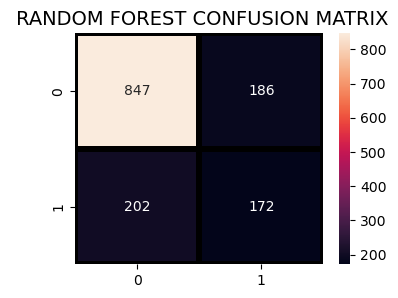

In [177]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

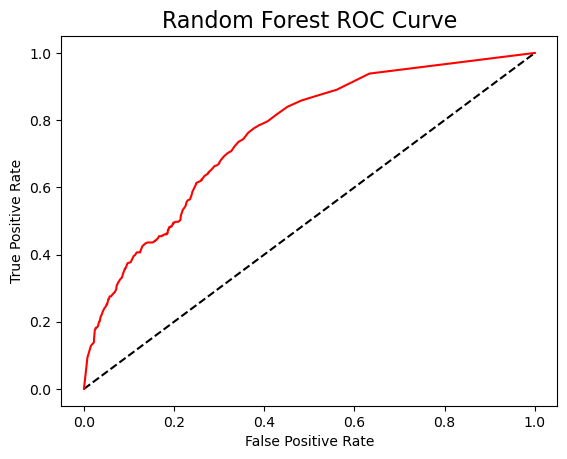

In [178]:
y_rfpred_prob = rf_model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show()

### Decision Tree Classifier

In [180]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

predictdt_y = dt_model.predict(X_test)

accuracy_dt = accuracy_score(predictdt_y,y_test)
precision_dt = precision_score(predictdt_y,y_test)
f1_dt = f1_score(predictdt_y,y_test)
recall_dt = recall_score(predictdt_y,y_test)
print("Decision Tree accuracy:",accuracy_dt)
print("Decision Tree precision:",precision_dt)
print("Decision Tree F1_Score:",f1_dt)
print("Decision Tree Recall:",recall_dt)

Decision Tree accuracy: 0.736318407960199
Decision Tree precision: 0.49732620320855614
Decision Tree F1_Score: 0.5006729475100942
Decision Tree Recall: 0.5040650406504065


### AdaBoost Classifier

In [182]:
a_model = AdaBoostClassifier()
a_model.fit(X_train, y_train)
a_preds = a_model.predict(X_test)

accuracy_a = accuracy_score(a_preds,y_test)
precision_a = precision_score(a_preds,y_test)
f1_a = f1_score(a_preds,y_test)
recall_a = recall_score(a_preds,y_test)
print("Decision Tree accuracy:",accuracy_a)
print("Decision Tree precision:",precision_a)
print("Decision Tree F1_Score:",f1_a)
print("Decision Tree Recall:",recall_a)


Decision Tree accuracy: 0.7839374555792467
Decision Tree precision: 0.4893048128342246
Decision Tree F1_Score: 0.5462686567164179
Decision Tree Recall: 0.6182432432432432


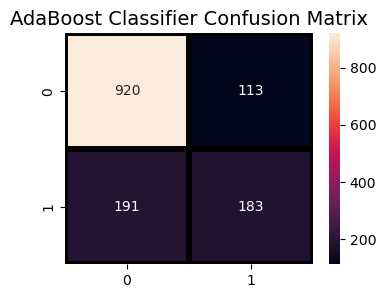

In [183]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

###  Gradient Boosting Classifier

In [185]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

In [186]:
accuracy_gb = accuracy_score(gb_preds,y_test)
precision_gb = precision_score(gb_preds,y_test)
f1_gb = f1_score(gb_preds,y_test)
recall_gb = recall_score(gb_preds,y_test)
print("Decision Tree accuracy:",accuracy_gb)
print("Decision Tree precision:",precision_gb)
print("Decision Tree F1_Score:",f1_gb)
print("Decision Tree Recall:",recall_gb)

Decision Tree accuracy: 0.7789623312011372
Decision Tree precision: 0.4839572192513369
Decision Tree F1_Score: 0.537890044576523
Decision Tree Recall: 0.6053511705685619


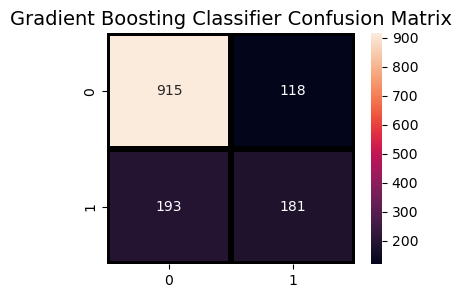

In [187]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

### Voting Classifier
Let's now predict the final model based on the highest majority of voting and check it's score.

In [189]:

# Step 1: Define your base classifiers
model = LogisticRegression(max_iter=1000)
k_model = KNeighborsClassifier(n_neighbors=16)
s_model = SVC(random_state=1, probability=True)  # probability=True for soft voting
r_model = RandomForestClassifier(random_state=42)
d_model = DecisionTreeClassifier(random_state=42)
ab_model = AdaBoostClassifier(random_state=42)
g_model = GradientBoostingClassifier(random_state=42)


voting_clf_soft = VotingClassifier(estimators=[
    ('lr', model),
    ('knn', k_model),
    ('svc', s_model),
    ('rf', r_model),
    ('dt', d_model),
    ('ada', ab_model),
    ('gb', g_model)
], voting='soft')

voting_clf_soft.fit(X_train, y_train)

prediction_test = voting_clf_soft.predict(X_test)

accuracy_v = accuracy_score(y_test,prediction_test)
precision_v = precision_score(prediction_test,y_test)
f1_v = f1_score(prediction_test,y_test)
recall_v = recall_score(prediction_test,y_test)
print("Voting accuracy:",accuracy_v)
print("Voting precision:",precision_v)
print("Voting F1_Score:",f1_v)
print("Voting Recall:",recall_v)

Voting accuracy: 0.7697228144989339
Voting precision: 0.44385026737967914
Voting F1_Score: 0.5060975609756098
Voting Recall: 0.5886524822695035


In [190]:
# Step 1: Define your base classifiers
model = LogisticRegression(max_iter=2000)
k_model = KNeighborsClassifier(n_neighbors=16)
s_model = SVC(random_state=1, probability=True)  # probability=True for soft voting
r_model = RandomForestClassifier(random_state=62)
d_model = DecisionTreeClassifier(random_state=62)
ab_model = AdaBoostClassifier(random_state=62)
g_model = GradientBoostingClassifier(random_state=62)


voting_clf_hard = VotingClassifier(estimators=[
    ('lr', model),
    ('knn', k_model),
    ('svc', s_model),
    ('rf', r_model),
    ('dt', d_model),
    ('ada', ab_model),
    ('gb', g_model)
], voting='soft')

voting_clf_hard.fit(X_train, y_train)

prediction_test = voting_clf_hard.predict(X_test)

accuracy_v = accuracy_score(y_test,prediction_test)
precision_v = precision_score(prediction_test,y_test)
f1_v = f1_score(prediction_test,y_test)
recall_v = recall_score(prediction_test,y_test)
print("Voting accuracy:",accuracy_v)
print("Voting precision:",precision_v)
print("Voting F1_Score:",f1_v)
print("Voting Recall:",recall_v)

Voting accuracy: 0.7704335465529495
Voting precision: 0.44919786096256686
Voting F1_Score: 0.5098634294385432
Voting Recall: 0.5894736842105263


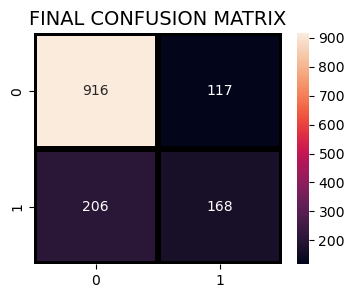

In [191]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

In [161]:
import pickle

In [167]:
with open("logistic_model.pkl", "wb") as file:
    pickle.dump(model, file)


In [169]:
LogisticRegression()


LogisticRegression()

In [171]:
import pickle
from sklearn.linear_model import LogisticRegression
# Assuming you have a trained model 'model'
pickle.dump(model, open('logistic_regression_model.pkl', 'wb'))


In [173]:
model = pickle.load(open('logistic_regression_model.pkl', 'rb'))
print(type(model))  # This should output: <class 'sklearn.linear_model._logistic.LogisticRegression'>

<class 'sklearn.linear_model._logistic.LogisticRegression'>
